In [539]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [540]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'lah'])
stopwords = list_stopwords

In [541]:
document = pd.read_csv('data/dataset_predicted_sentiment.csv', sep=',')

In [542]:
document = document.Tweet.to_list()

In [543]:
document[:10]

['@FIFAWorldCup Hai FIFA ....kami Indonesia dan kami adalah tim yang paling berkembang dan energik di Asia tanpa bergantung pada wasit atau permainan kasar tidak seperti tim dari timur tengah dan anda diam melihat hal tsb tidak melakukan apapun padahal sepak bola adl. Tentang fair play',
 '@emhendraka Nek ra itungan ngko koyo wasit soko oman kae',
 '@SiaranBolaLive Tak kasi sambel matanya ini wasit dajal..biar sekalian gk liat waktu..',
 '@fifamedia Hai FIFA ....kami Indonesia ....kami adalah tim yang paling berkembang dan energik di Asia tanpa bergantung pada wasit atau permainan kasar tidak seperti tim dari timur tengah dan anda diam melihat hal tsb tidak melakukan apapun padahal sepak bola adl. Tentang fair play',
 '@yellowsea_sun @idextratime Kenapa bisa lolos jadi wasit ya??? @FIFAcom @FIFAWorldCup @fifamedia #Chicken #Stupid #Rubbish #SOS',
 '@kanalcasn @unmagnetism Badan gede brewokan tp senggol dikit guling² langsung ngadu wasit. Besok² gk usah main bola main bekel aja kalian '

In [544]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(document[:])

d:\kode random\Web Bu akhsin\Streamlit\stenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


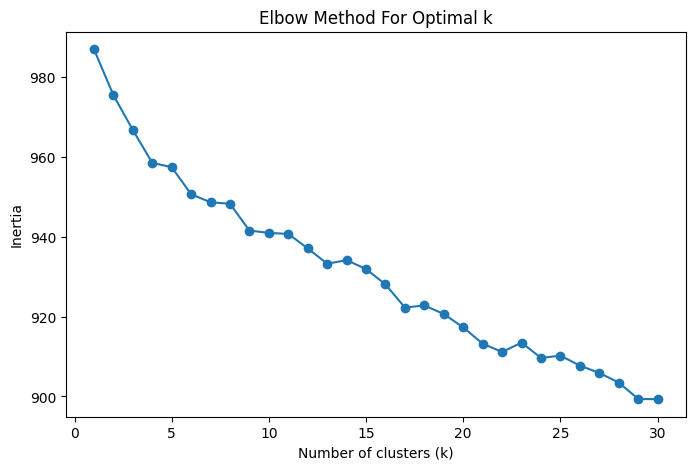

In [545]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

inertia_values = []
for k in range(1, 31):
    model = KMeans(n_clusters=k, init='k-means++' , max_iter=1000, n_init=10, random_state=10)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [546]:
true_k = 17
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10, random_state=10)
model.fit(X)

KMeans(max_iter=100, n_clusters=17, n_init=10, random_state=10)

In [547]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 tuh
 mamatalkatiri
 wasit
 pas
 bola
 ruangtaktik
 dibuang
 slesai
 kntl
 gua

Cluster 1:
 indonesia
 bangsat
 wasit
 jd
 idextratime
 menang
 kalo
 dunia
 negara
 gak

Cluster 2:
 marah
 fans
 tp
 indo
 wasit
 kalo
 timnas
 susah
 rossifinza
 fifa

Cluster 3:
 anjing
 wasit
 kegblgnunfaedh
 unmagnetism
 afcmafia
 idextratime
 mafiawasit
 banget
 fsasialive
 gara2

Cluster 4:
 kontol
 wasit
 idextratime
 unmagnetism
 gue
 mati
 abelnoverda
 nocontextfooty
 satria_gigin
 anjeng

Cluster 5:
 nya
 kesel
 wasit
 orang
 aja
 jam
 tau
 idextratime
 24
 malem

Cluster 6:
 arab
 wasit
 idextratime
 bener
 kegblgnunfaedh
 aja
 afc
 mulu
 terdeteksi
 blantik_pedhet2

Cluster 7:
 bahrain
 wasit
 pemain
 udah
 vs
 indonesia
 time
 menit
 kek
 banget

Cluster 8:
 al
 kaf
 ahmed
 https
 co
 indonesia
 wasit
 vs
 bahrain
 dv0dhlcrin

Cluster 9:
 prime
 viu
 zonauang
 netflix
 canva
 wtb
 wts
 co
 https
 youtube

Cluster 10:
 wasit
 idextratime
 timur
 gak
 afcasiancup
 semalem
 tolol
 keg

In [548]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

0.016329012812282533

In [549]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

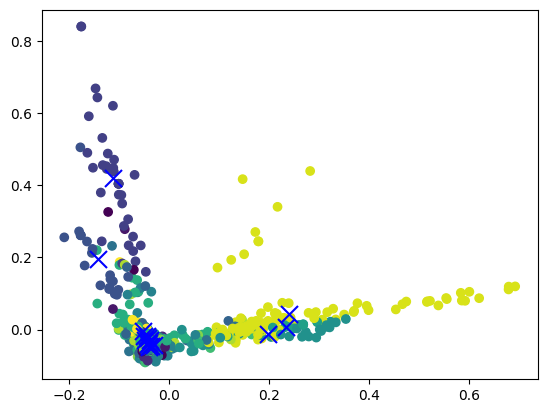

In [550]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')